<a href="https://colab.research.google.com/github/kristofsl/rl-workshop/blob/main/rl_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install optuna==3.2.0
!pip install gymnasium==0.28.1
!pip install gym==0.25.2
!pip install mlflow==2.4.1

In [14]:
from typing import Tuple, List, Callable, Union, Optional, Dict
import numpy as np
import os
import pathlib
import imageio
from pathlib import Path
import pandas as pdbb
import gymnasium as gym
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from pathlib import Path
from gym.wrappers import RecordVideo
import datetime
import tensorflow as tf
import numpy as np
from tensorflow import keras
from collections import deque
import time
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os
import optuna
from optuna.importance import get_param_importances
import uuid
import mlflow

In [15]:
def evaluate(
    agent,
    env,
    n_episodes: int,
    observation_space_size: int
) -> Tuple[List, List]:

    # keep track of the reward and steps per episode
    reward_per_episode = []
    steps_per_episode = []

    for i in range(0, n_episodes):

        # reset and initial state from environment needs reshape to np array (tuple instead of array with dimensions 1,4)
        state = np.reshape(env.reset()[0], [1, observation_space_size])

        # initialize the cumulative steps and the rewards for this episode
        rewards = 0
        steps = 0

        # done = environment ended badly / environment ended after 500 episodes
        done = False
        truncated = False

        while not (done or truncated):

            # determine action based on the state
            action = agent.act(state)

            # take the action and observe the reward, new state, etc
            new_state, reward, done, truncated, info = env.step(action)

            # enchange the reward signal
            reward = enhance_reward_signal(new_state, reward, done, truncated, steps)

            # add the data from this step to the episode data
            rewards += reward
            steps += 1

            # reshape the new state
            state = np.reshape(new_state, [1, observation_space_size])

        reward_per_episode.append(rewards)
        steps_per_episode.append(steps)

    return reward_per_episode, steps_per_episode

In [16]:
# random agent
class RandomAgent:
    def __init__(self, env):
        self.env = env

    def act(self, state: np.array) -> int:
        return self.env.action_space.sample()

In [23]:
def enhance_reward_signal(next_state, reward, done, truncated, steps):
    if done:
        reward = -100
    elif truncated:
        reward = 100
    elif next_state[0] > 0.2:
        reward = -5
    elif next_state[0] < -0.2:
        reward = -5

    return reward

In [27]:
def record_random_agent():
    # trying the random agent first
    env = gym.make('CartPole-v1',render_mode = 'rgb_array_list')

    observation_space_size = env.observation_space.shape[0]

    # create a random agent
    random_agent = RandomAgent(env)

    # evaluate the random agent
    rewards, steps = evaluate(random_agent, env, 50, observation_space_size)

    # evaluation results
    median_steps = np.median(steps)
    mean_steps = np.mean(steps)
    std_steps = np.std(steps)

    print(f'median steps = {median_steps}')
    print(f'std steps    = {std_steps}')
    print(f'mean steps   = {mean_steps}')

    return rewards, steps

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# record a random agent
rewards, steps = record_random_agent()

median steps = 18.5
std steps    = 10.453726608248372
mean steps   = 22.14


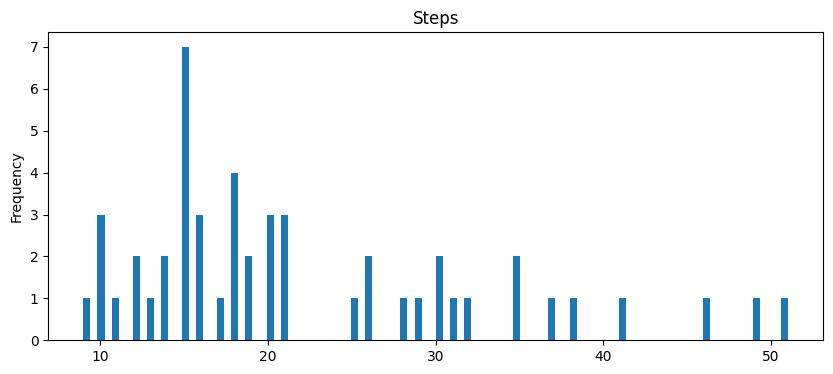

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Steps")
pd.Series(steps).plot(kind='hist', bins=100)

plt.show()